## Media Movil Simple
### Adrián Vázquez 
#### 09/07/21

In [9]:
# Librerias utilizadas
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [7]:
# Descargamos precios de la accion de google y los usamos como un DataFrame
precios_googl = pd.read_csv('datos/GOOG.csv')
precios_googl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-07-11,708.049988,716.510010,707.239990,715.090027,715.090027,1111800
1,2016-07-12,719.119995,722.940002,715.909973,720.640015,720.640015,1336900
2,2016-07-13,723.619995,724.000000,716.849976,716.979980,716.979980,935900
3,2016-07-14,721.580017,722.210022,718.030029,720.950012,720.950012,950200
4,2016-07-15,725.729980,725.739990,719.054993,719.849976,719.849976,1279300


#### <b> Graficamos los datos. </b>

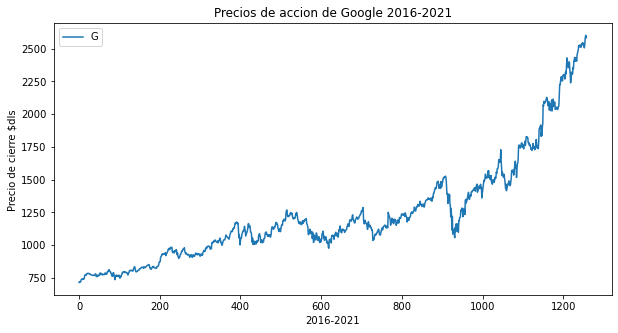

In [14]:
plt.figure(figsize = (10,5))
plt.plot(precios_googl['Close'], label = 'Acción de google')
plt.title('Precios de accion de Google 2016-2021')
plt.xlabel('2016-2021')
plt.ylabel('Precio de cierre $dls ')
plt.legend('Google')
plt.show()

### Manipulamos el DataFrame para crear nuestras medias moviles

In [16]:
MVS30 = pd.DataFrame()
MVS30['Close'] = precios_googl['Close'].rolling(window = 30).mean()
MVS30

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1253,2477.419019
1254,2484.695345
1255,2493.039339
1256,2499.535343


In [19]:
MVS30[MVS30.index == 30] # Para el dia 30 ya tenemos un calculo

,Close
30,758.688997


#### MVS de 100

In [20]:
MVS100 = pd.DataFrame()
MVS100['Close'] = precios_googl['Close'].rolling(window = 100).mean()
MVS100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1253,2272.196395
1254,2277.105094
1255,2282.105494
1256,2287.162096


In [23]:
MVS100[MVS100.index == 100]

,Close
100,770.5254


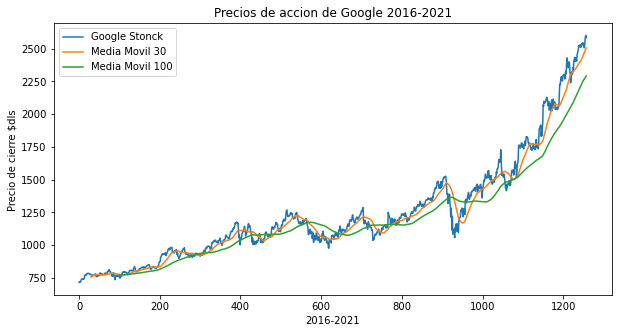

In [27]:
plt.figure(figsize = (10,5))
plt.plot(precios_googl['Close'], label = 'Google Stonck')
plt.plot(MVS30['Close'], label = 'Media Movil 30')
plt.plot(MVS100['Close'], label = 'Media Movil 100')
plt.title('Precios de accion de Google 2016-2021')
plt.xlabel('2016-2021')
plt.ylabel('Precio de cierre $dls ')
plt.legend(loc = 'upper left')
plt.show()

### Creación de algoritmo para identificar cortes de precio 

In [29]:
#convinamos el precio de google y el precio de cierre de MVS 30 Y 100
data = pd.DataFrame()
data['Google'] = precios_googl['Close']
data['MVS30'] = MVS30['Close']
data['MVS100'] = MVS100['Close']

data

,Google,MVS30,MVS100
0,715.090027,NaN,NaN
1,720.640015,NaN,NaN
2,716.979980,NaN,NaN
3,720.950012,NaN,NaN
4,719.849976,NaN,NaN
...,...,...,...
1253,2527.370117,2477.419019,2272.196395
1254,2574.379883,2484.695345,2277.105094
1255,2595.419922,2493.039339,2282.105494
1256,2601.550049,2499.535343,2287.162096


### Creamos una función para determinar si estamos en una zona para comprar o en una zona para vender

In [43]:
def señal(datos):
    compra = []     # puntos optimos para comprar
    venta  = []    # puntos optimos para vender
    condicion = 0 
    
    for dia  in range(len(data)):
        
        if data['MVS30'][dia] > data['MVS100'][dia]:
            if condicion != 1:
                compra.append(data['Google'][dia])
                venta.append(np.nan)
                condicion = 1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
                
        elif  data['MVS30'][dia] < data['MVS100'][dia]:
            if condicion != -1:
                venta.append(data['Google'][dia])
                compra.append(np.nan)
                condicion = -1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
        else:
            compra.append(np.nan)
            venta.append(np.nan)
    
    return (compra,venta)

                
            
            
    

In [44]:
señales = señal(data) # tupla lista de compra y venta

data['Compra'] = señales[0]
data['Venta'] = señales[1]
data

,Google,MVS30,MVS100,Compra,Venta
0,715.090027,NaN,NaN,NaN,NaN
1,720.640015,NaN,NaN,NaN,NaN
2,716.979980,NaN,NaN,NaN,NaN
3,720.950012,NaN,NaN,NaN,NaN
4,719.849976,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1253,2527.370117,2477.419019,2272.196395,NaN,NaN
1254,2574.379883,2484.695345,2277.105094,NaN,NaN
1255,2595.419922,2493.039339,2282.105494,NaN,NaN
1256,2601.550049,2499.535343,2287.162096,NaN,NaN


### Graficamos 


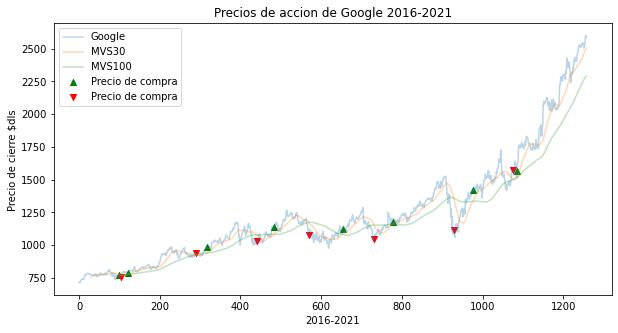

In [47]:
plt.figure(figsize = (10,5))
plt.plot(data['Google'], label = 'Google', alpha = 0.3)
plt.plot(data['MVS30'], label = 'MVS30',  alpha = 0.3)
plt.plot(data['MVS100'], label = 'MVS100',  alpha = 0.3)
plt.scatter(data.index, data['Compra'],label ='Precio de compra', marker = '^', color = 'green')
plt.scatter(data.index, data['Venta'],label ='Precio de compra', marker = 'v', color = 'red')
plt.title('Precios de accion de Google 2016-2021')
plt.xlabel('2016-2021')
plt.ylabel('Precio de cierre $dls ')
plt.legend(loc = 'upper left')
plt.show()
